In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import glob
import cv2

In [2]:
path= glob.glob('D:/Master2/DL/TP/TP2/awe/*')

In [3]:
Data = []
Labels = []
for i in path:
    file = glob.glob(i+'/*.png')
    for j in file:
        img = cv2.imread(j)
        Data.append(cv2.resize(img,(32,32)))#(img)
        Labels.append(j[25:28])

In [4]:
len(Data)

1000

In [5]:
from itertools import chain
with open('D:/Master2/DL/TP/TP2/awe/train.txt') as f:
    train_indx=[]
    for line in f: 
        train_indx.append([int(x) for x in line.split()])
    train_indx = list(chain.from_iterable(train_indx))

In [6]:
with open('D:/Master2/DL/TP/TP2/awe/test.txt') as f:
    test_indx=[]
    for line in f: 
        test_indx.append([int(x) for x in line.split()])
    test_indx = list(chain.from_iterable(test_indx))

In [7]:
X_train,y_train,X_test,y_test = [],[],[],[]

for i in train_indx:
    X_train.append(Data[i-1])#/255)
    y_train.append(Labels[i-1])
    
for i in test_indx:
    X_test.append(Data[i-1])#/255)
    y_test.append(Labels[i-1])

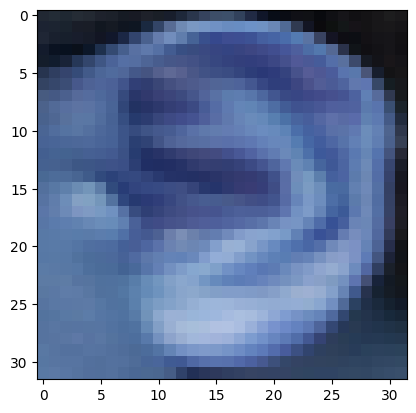

In [8]:
plt.imshow(X_train[99])

In [9]:
#convert to arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)
print('Train data size: ',len(X_train),'Images')
print('Test data size: ',len(X_test),'Images')

Train data size:  600 Images
Test data size:  400 Images


In [10]:
len(y_train)

600

In [11]:
np.array(y_train).shape

(600,)

In [12]:
#Normalize our data*
X_train = X_train/255
X_test = X_test/255

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [13]:
#import libiraries
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [14]:
# converting labels to categorical features (1 hot encoding)
y_train = keras.utils.to_categorical(y_train) #100 cateories
y_test = keras.utils.to_categorical(y_test)

In [15]:
print(X_train.shape)
print(y_train.shape)


(600, 32, 32, 3)
(600, 101)


In [16]:
# CNN Model
# Number of convolutiuonal filters is 32, each filter is 3*3 ( whith activation function Relu)
# Max pooling layer 2*2
# Flatten nodes --> 100 Nodes
# Output layer 100 nodes


model = Sequential()
model.add(Convolution2D(32,3, data_format = 'channels_last',activation='relu',input_shape=((32,32,3)))) # keras need the number of channels
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #convert matrix to a single victor
model.add(Dense(600))
model.add(Dropout(0.5)) # Droupout helps us to prevent the overfitting
model.add(Dense(101)) # output layer
model.add(Activation('softmax'))

# then we compile it with loss function, cross entropy
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 600)               4320600   
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 101)               60701     
                                                        

In [18]:
#fit the model with 100 images
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 350, verbose=1)

Epoch 1/350
19/19 [==============================] - 4s 80ms/step - loss: 5.2313 - accuracy: 0.0100 - val_loss: 4.6109 - val_accuracy: 0.0125
Epoch 2/350
19/19 [==============================] - 1s 74ms/step - loss: 4.5266 - accuracy: 0.0400 - val_loss: 4.5507 - val_accuracy: 0.0250
Epoch 3/350
19/19 [==============================] - 1s 46ms/step - loss: 4.3390 - accuracy: 0.0867 - val_loss: 4.4669 - val_accuracy: 0.0400
Epoch 4/350
19/19 [==============================] - 1s 47ms/step - loss: 3.9569 - accuracy: 0.1817 - val_loss: 4.2931 - val_accuracy: 0.0900
Epoch 5/350
19/19 [==============================] - 1s 64ms/step - loss: 3.4093 - accuracy: 0.3117 - val_loss: 4.1137 - val_accuracy: 0.1425
Epoch 6/350
19/19 [==============================] - 1s 48ms/step - loss: 2.8340 - accuracy: 0.4117 - val_loss: 3.9077 - val_accuracy: 0.1625
Epoch 7/350
19/19 [==============================] - 1s 60ms/step - loss: 2.1529 - accuracy: 0.5867 - val_loss: 3.7273 - val_accuracy: 0.2100
Epoch 

In [19]:
model.predict(X_test)

13/13 [==============================] - 0s 8ms/step


array([[3.8027365e-06, 7.8918083e-06, 7.9183796e-05, ..., 4.4688845e-06,
        1.3303858e-06, 1.7623587e-06],
       [2.2593329e-05, 1.4111852e-06, 1.0601806e-04, ..., 5.0070832e-07,
        6.1523224e-06, 3.8555218e-04],
       [5.6322656e-06, 7.3011142e-07, 1.3844529e-04, ..., 5.6699668e-05,
        2.8761782e-04, 3.7999416e-06],
       ...,
       [3.0085920e-07, 5.9703460e-08, 9.9491616e-11, ..., 5.1274848e-05,
        4.5805131e-12, 3.6059660e-08],
       [5.9276192e-07, 5.8622991e-05, 2.3397895e-07, ..., 1.4632210e-04,
        1.4253995e-06, 6.3272819e-02],
       [8.3405757e-06, 1.3631481e-02, 8.6736821e-07, ..., 3.4035440e-03,
        9.8555363e-05, 1.7450373e-07]], dtype=float32)

In [20]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 7ms/step - loss: 4.3796 - accuracy: 0.3350


[4.379632472991943, 0.33500000834465027]

### --------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
tf.keras.backend.clear_session()
model = keras.models.Sequential()
# for training
batch_size = 200

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#hot vectors
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)